# Exercise 3
（a）Each sample has only one chance to be assigned to the training set or test set during each iteration.
     1. Divide all training set S into k non-intersecting subsets. 
       Assuming the number of training samples in S is m, then each sub-set has m/k training samples, and the corresponding subsets are          called {s1,s2... , sk}.
     2. Take one sub-set from each sub-set as the test set and the other k-1 as the training set
     3. Train the model according to the training.
     4. Put the model on the test set and get the classification rate.
     5. Calculate the average value of the classification rate obtained k times as the true classification rate of the model
 (b)  1.Advantage:
     within a limit, the larger the value of k, the better. Because the larger the k is, the more times we verify it, and the more            accurate the training model can be represented by the average taken out at the end
    2.Disadvantages:
     It is easy to overburden the machine and cost a lot of time.
     The data in the test set (or verification set) of each verification is too small to obtain accurate false positives.

# Exercise 8

In [7]:
#install.packages("glmnet")
library("glmnet")

Warning message:
"package 'glmnet' was built under R version 3.6.2"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.2"Loaded glmnet 3.0-2



In [1]:
set.seed(1)
y <- rnorm(100) 
x <- rnorm(100)
y <- x - 2*x^2 + rnorm(100)

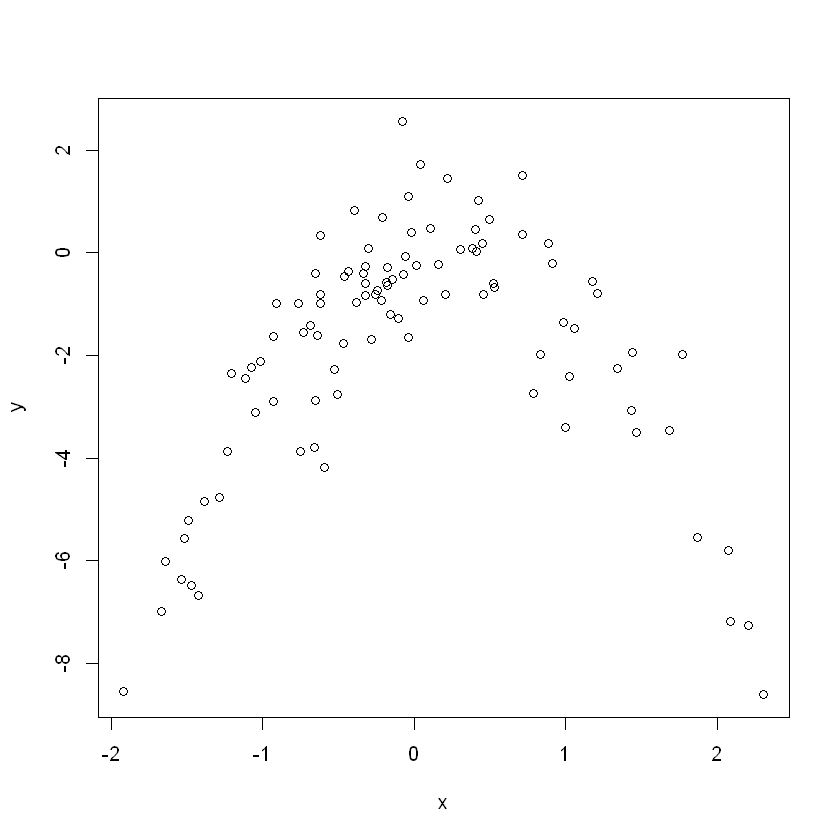

In [2]:
plot(x, y)

In [8]:
set.seed(1)
df <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)
fit1 <- glm(y ~ x, data=df)
cv.err1 <- cv.glm(df, fit1)
cv.err1$delta
fit2 <- glm(y ~ x + x2, data=df)
cv.err2 <- cv.glm(df, fit2)
cv.err2$delta
fit3 <- glm(y ~ x + x2 + x3, data=df)
cv.err3 <- cv.glm(df, fit3)
cv.err3$delta
fit4 <- glm(y ~ x + x2 + x3 + x4, data=df)
cv.err4 <- cv.glm(df, fit4)
cv.err4$delta

ERROR: Error in cv.glm(df, fit1): 没有"cv.glm"这个函数


In [4]:
set.seed(2)
df <- data.frame(y, x, x2=x^2, x3=x^3, x4=x^4)
fit1 <- glm(y ~ x, data=df)
cv.err1 <- cv.glm(df, fit1)
cv.err1$delta
fit2 <- glm(y ~ x + x2, data=df)
cv.err2 <- cv.glm(df, fit2)
cv.err2$delta
fit3 <- glm(y ~ x + x2 + x3, data=df)
cv.err3 <- cv.glm(df, fit3)
cv.err3$delta
fit4 <- glm(y ~ x + x2 + x3 + x4, data=df)
cv.err4 <- cv.glm(df, fit4)
cv.err4$delta

ERROR: Error in cv.glm(df, fit1): 没有"cv.glm"这个函数


In [5]:
fit0 <- lm(y ~ poly(x,4))
summary(fit0)


Call:
lm(formula = y ~ poly(x, 4))

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8914 -0.5244  0.0749  0.5932  2.7796 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.041 on 95 degrees of freedom
Multiple R-squared:  0.8134,	Adjusted R-squared:  0.8055 
F-statistic: 103.5 on 4 and 95 DF,  p-value: < 2.2e-16


# Exercise 1
#(a）Best subset will have the smallest train RSS because the models will optimize on the training RSS and best subset will try every model that forward and backward selection will try.
#(b）The best test RSS model could be any of the three. Best subset could easily overfit if the data has large $p$ predictors relative to $n$ observations. Forward and backward selection might not converge on the same model but try the same number of models and hard to say which selection process would be better. 
#(c)
  * TRUE 
  * TRUE
  * FALSE
  * FALSE
  * FALSE

# Exercise 9

In [16]:
#install.packages("pls")
library("pls")

Warning message:
"package 'pls' was built under R version 3.6.2"
Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings



In [9]:
require(ISLR)
data(College)
set.seed(1)
trainid <- sample(1:nrow(College), nrow(College)/2)
train <- College[trainid,]
test <- College[-trainid,]
str(College)

Loading required package: ISLR
Warning message:
"package 'ISLR' was built under R version 3.6.2"

'data.frame':	777 obs. of  18 variables:
 $ Private    : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ Apps       : num  1660 2186 1428 417 193 ...
 $ Accept     : num  1232 1924 1097 349 146 ...
 $ Enroll     : num  721 512 336 137 55 158 103 489 227 172 ...
 $ Top10perc  : num  23 16 22 60 16 38 17 37 30 21 ...
 $ Top25perc  : num  52 29 50 89 44 62 45 68 63 44 ...
 $ F.Undergrad: num  2885 2683 1036 510 249 ...
 $ P.Undergrad: num  537 1227 99 63 869 ...
 $ Outstate   : num  7440 12280 11250 12960 7560 ...
 $ Room.Board : num  3300 6450 3750 5450 4120 ...
 $ Books      : num  450 750 400 450 800 500 500 450 300 660 ...
 $ Personal   : num  2200 1500 1165 875 1500 ...
 $ PhD        : num  70 29 53 92 76 67 90 89 79 40 ...
 $ Terminal   : num  78 30 66 97 72 73 93 100 84 41 ...
 $ S.F.Ratio  : num  18.1 12.2 12.9 7.7 11.9 9.4 11.5 13.7 11.3 11.5 ...
 $ perc.alumni: num  12 16 30 37 2 11 26 37 23 15 ...
 $ Expend     : num  7041 10527 8735 19016 10922 ...
 $ Grad.Rate  : nu

In [10]:
fit.lm <- lm(Apps~., data=train)
pred.lm <- predict(fit.lm, test)
(err.lm <- mean((test$Apps - pred.lm)^2)) 

[1] 1135758

In [11]:
require(glmnet)
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.ridge <- cv.glmnet(xmat.train, train$Apps, alpha=0)
(lambda <- fit.ridge$lambda.min)  # optimal lambda
pred.ridge <- predict(fit.ridge, s=lambda, newx=xmat.test)
(err.ridge <- mean((test$Apps - pred.ridge)^2))

[1] 405.8404

[1] 976261.5

In [12]:
require(glmnet)
xmat.train <- model.matrix(Apps~., data=train)[,-1]
xmat.test <- model.matrix(Apps~., data=test)[,-1]
fit.lasso <- cv.glmnet(xmat.train, train$Apps, alpha=1)
(lambda <- fit.lasso$lambda.min)  # optimal lambda
pred.lasso <- predict(fit.lasso, s=lambda, newx=xmat.test)
(err.lasso <- mean((test$Apps - pred.lasso)^2))  # test error
coef.lasso <- predict(fit.lasso, type="coefficients", s=lambda)[1:ncol(College),]
coef.lasso[coef.lasso != 0]
length(coef.lasso[coef.lasso != 0])

[1] 1.97344

[1] 1115901

(Intercept)    PrivateYes        Accept        Enroll     Top10perc 
-7.688896e+02 -3.127034e+02  1.762718e+00 -1.318195e+00  6.482356e+01 
    Top25perc   F.Undergrad   P.Undergrad      Outstate    Room.Board 
-2.081406e+01  7.119149e-02  1.246161e-02 -1.049091e-01  2.088305e-01 
        Books      Personal           PhD      Terminal     S.F.Ratio 
 2.926466e-01  3.955068e-03 -1.455463e+01  5.395858e+00  2.171398e+01 
  perc.alumni        Expend     Grad.Rate 
 5.088260e-01  4.824455e-02  7.036148e+00

[1] 18

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4288     4006     2373     2372     2069     1961     1919
adjCV         4288     4007     2368     2369     1999     1948     1911
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1919     1921     1876      1832      1832      1836      1837
adjCV     1912     1915     1868      1821      1823      1827      1827
       14 comps  15 comps  16 comps  17 comps
CV         1853      1759      1341      1270
adjCV      1850      1733      1326      1257

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       32.20    57.78    65.31    70.99    76.37    81.27     84.8    87.85
Apps    13.44    70.93    71.07    79.87    81.15    82.25     82.3    82.3

[1] 1137877

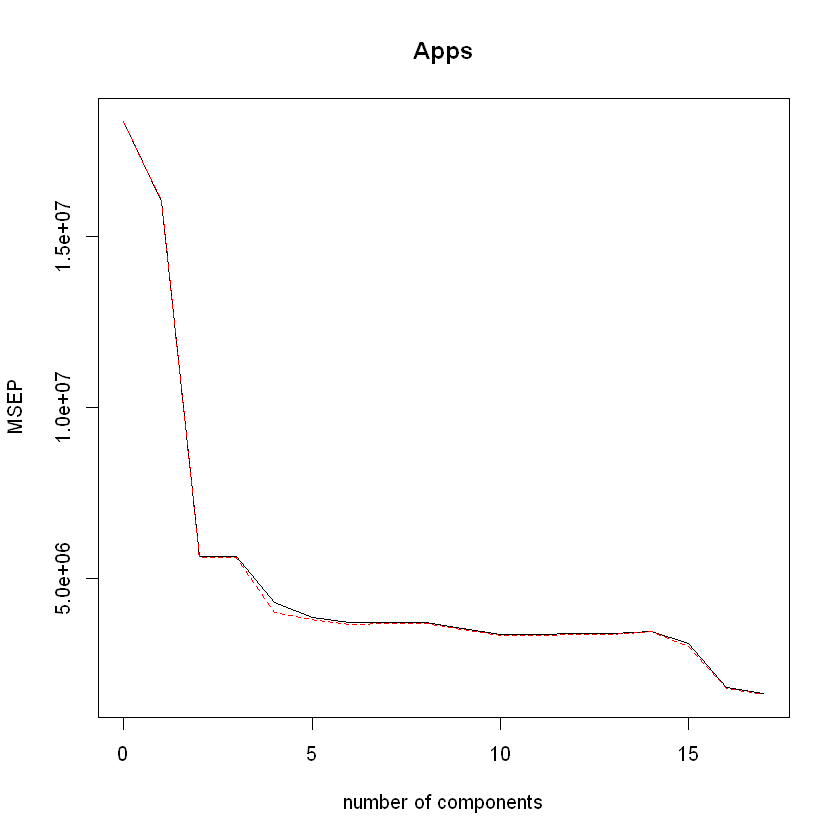

In [17]:
require(pls)
set.seed(1)
fit.pcr <- pcr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pcr, val.type="MSEP")
summary(fit.pcr)
pred.pcr <- predict(fit.pcr, test, ncomp=16)  # min Cv at M=16
(err.pcr <- mean((test$Apps - pred.pcr)^2)) 

Data: 	X dimension: 388 17 
	Y dimension: 388 1
Fit method: kernelpls
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV            4288     2217     2019     1761     1630     1533     1347
adjCV         4288     2211     2012     1749     1605     1510     1331
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV        1309     1303     1286      1283      1283      1277      1271
adjCV     1296     1289     1273      1270      1270      1264      1258
       14 comps  15 comps  16 comps  17 comps
CV         1270      1270      1270      1270
adjCV      1258      1257      1257      1257

TRAINING: % variance explained
      1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       27.21    50.73    63.06    65.52    70.20    74.20    78.62    80.81
Apps    75.39    81.24    86.97    91.14    92.62    93.43    93.56    

[1] 1131661

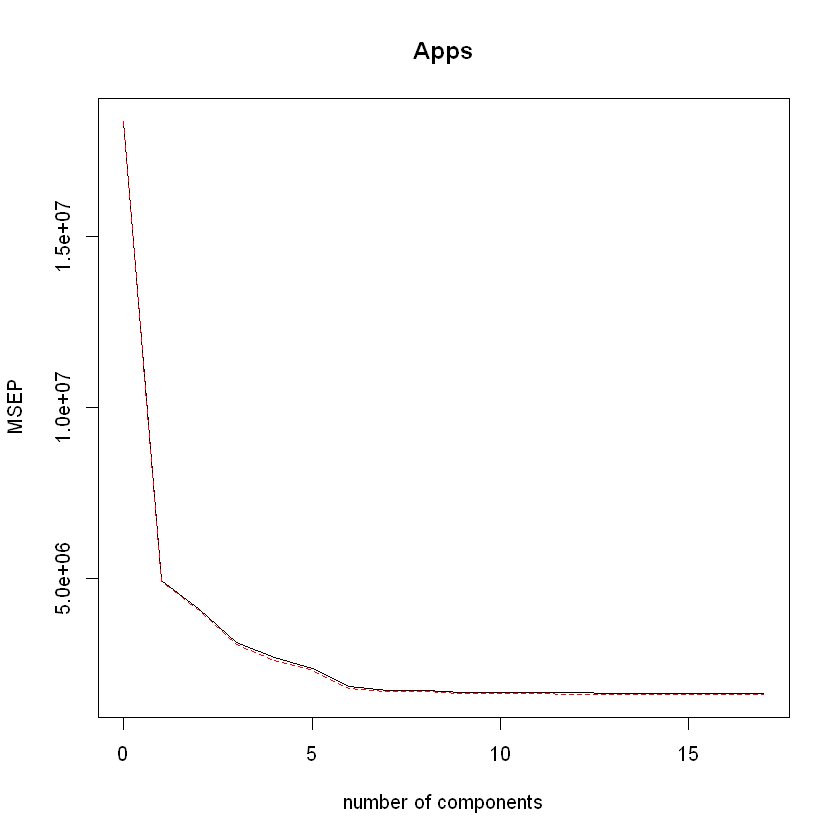

In [18]:
require(pls)
set.seed(1)
fit.pls <- plsr(Apps~., data=train, scale=TRUE, validation="CV")
validationplot(fit.pls, val.type="MSEP")
summary(fit.pls)
pred.pls <- predict(fit.pls, test, ncomp=10)  # min Cv at M=10
(err.pls <- mean((test$Apps - pred.pls)^2))

# Exercise 9

In [29]:
#install.packages("MASS")
library("MASS")
#install.packages("boot")
library("boot")
library("splines")


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


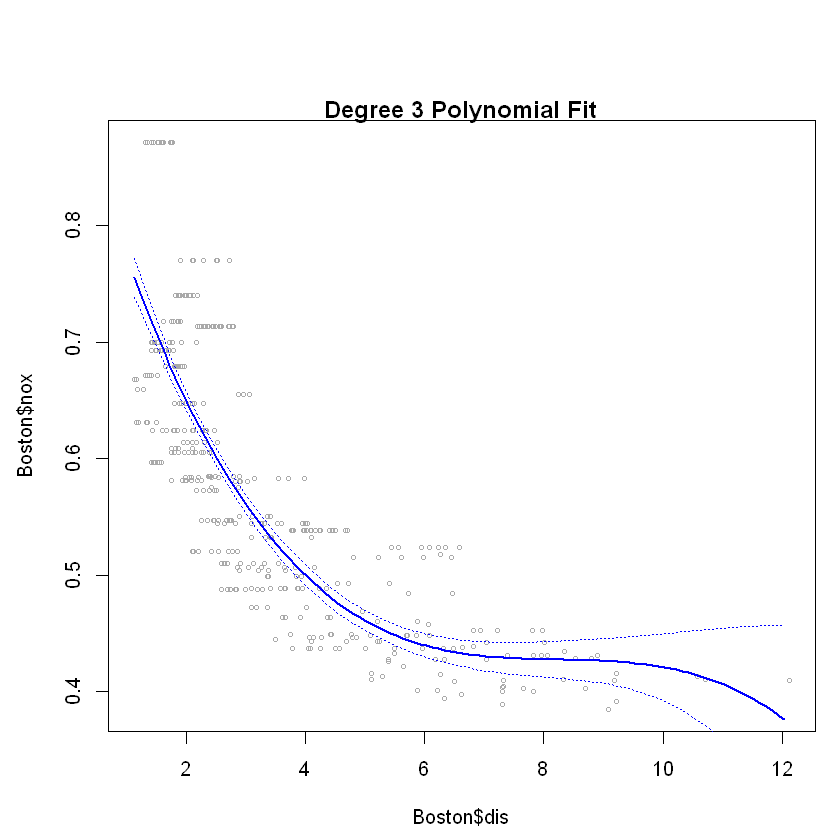

In [21]:
require(MASS)
data(Boston)
set.seed(1)
fit.03 <- lm(nox~poly(dis,3), data=Boston)
dislims <- range(Boston$dis)
dis.grid <- seq(dislims[1], dislims[2], 0.1)
preds <- predict(fit.03, newdata=list(dis=dis.grid), se=TRUE)
se.bands <- preds$fit + cbind(2*preds$se.fit, -2*preds$se.fit)
par(mfrow=c(1,1), mar=c(4.5,4.5,1,1), oma=c(0,0,4,0))
plot(Boston$dis, Boston$nox, xlim=dislims, cex=0.5, col="darkgrey")
title("Degree 3 Polynomial Fit")
lines(dis.grid, preds$fit, lwd=2, col="blue")
matlines(dis.grid, se.bands, lwd=1, col="blue", lty=3)
summary(fit.03)

[1] 2.768563 2.035262 1.934107 1.932981 1.915290 1.878257 1.849484 1.835630
 [9] 1.833331 1.832171

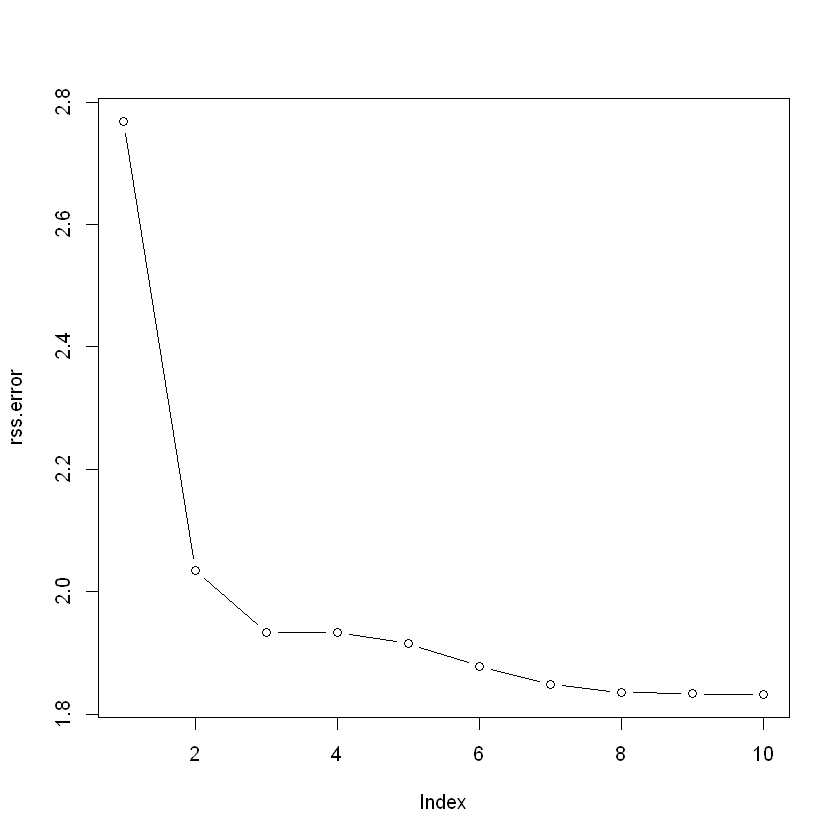

In [22]:
rss.error <- rep(0,10)
for (i in 1:10) {
  lm.fit <- lm(nox~poly(dis,i), data=Boston)
  rss.error[i] <- sum(lm.fit$residuals^2)
}
rss.error
plot(rss.error, type="b")  

[1] 0.005558263 0.004085706 0.003876521 0.003863342 0.004237452 0.005686862
 [7] 0.010278897 0.006810868 0.033308607 0.004075599

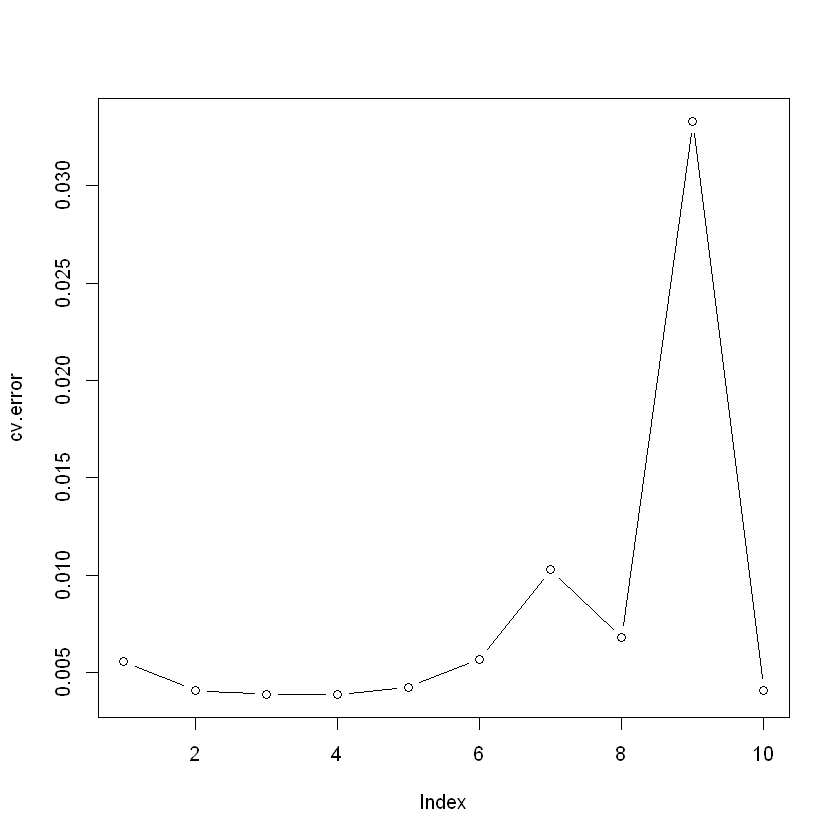

In [26]:
require(boot)
set.seed(1)
cv.error <- rep(0,10)
for (i in 1:10) {
  glm.fit <- glm(nox~poly(dis,i), data=Boston)
  cv.error[i] <- cv.glm(Boston, glm.fit, K=10)$delta[1]  # [1]:std, [2]:bias-corrected
}
cv.error
plot(cv.error, type="b")

50% 
3.20745

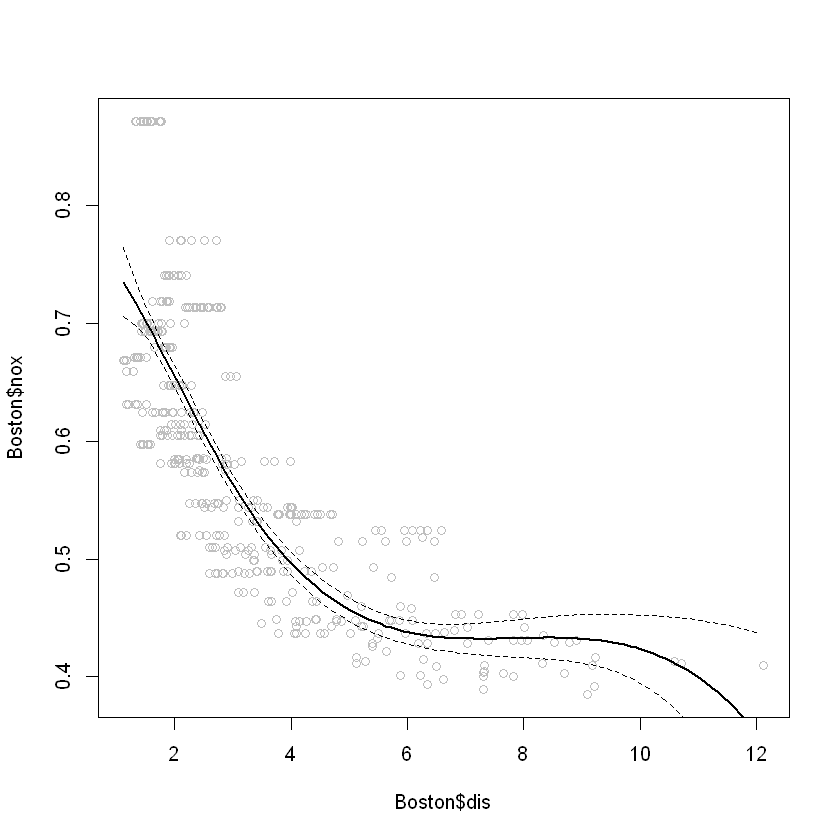

In [30]:
require(splines)
fit.sp <- lm(nox~bs(dis, df=4), data=Boston)
pred <- predict(fit.sp, newdata=list(dis=dis.grid), se=T)
plot(Boston$dis, Boston$nox, col="gray")
lines(dis.grid, pred$fit, lwd=2)
lines(dis.grid, pred$fit+2*pred$se, lty="dashed")
lines(dis.grid, pred$fit-2*pred$se, lty="dashed")
# set df to select knots at uniform quantiles of `dis`
attr(bs(Boston$dis,df=4),"knots")

[1] 1.922775 1.840173 1.833966 1.829884 1.816995 1.825653 1.792535

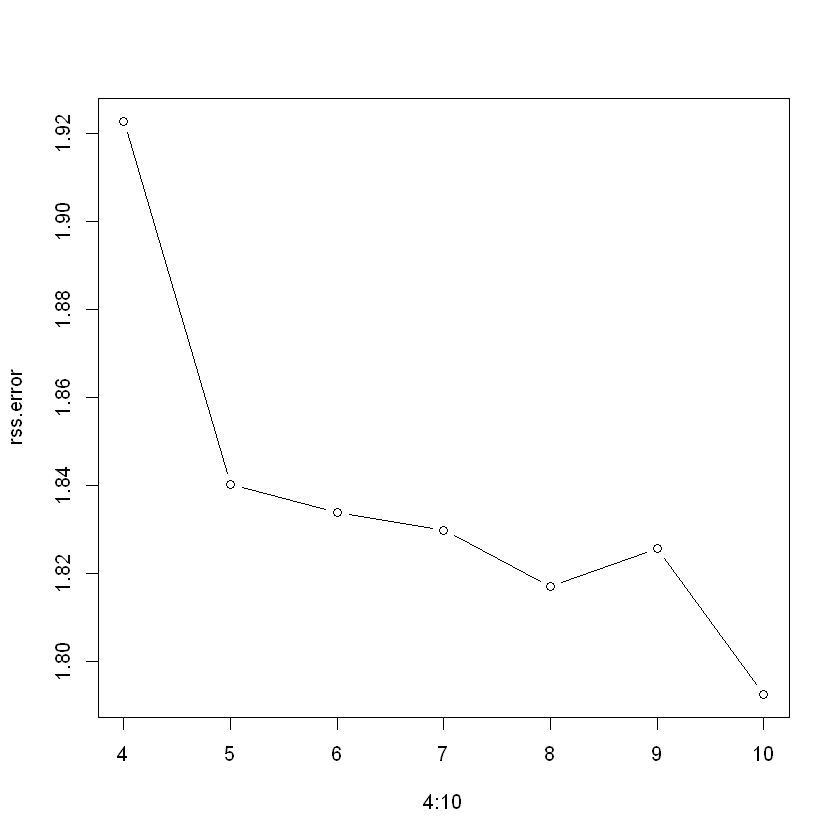

In [31]:
require(splines)
set.seed(1)
rss.error <- rep(0,7)
for (i in 4:10) {
  fit.sp <- lm(nox~bs(dis, df=i), data=Boston)
  rss.error[i-3] <- sum(fit.sp$residuals^2)
}
rss.error
plot(4:10, rss.error, type="b") 

Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.23925), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.23925), Boundary.knots = c(1.137, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`50%` = 3.2157), Boundary.knots = c(1.1296, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.35953333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(dis, degree = 3L, knots = c(`33.33333%` = 2.35953333333333, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(

[1] 0.003918838 0.003729024 0.003722683 0.003696789 0.003746270 0.003742534
[7] 0.003720942

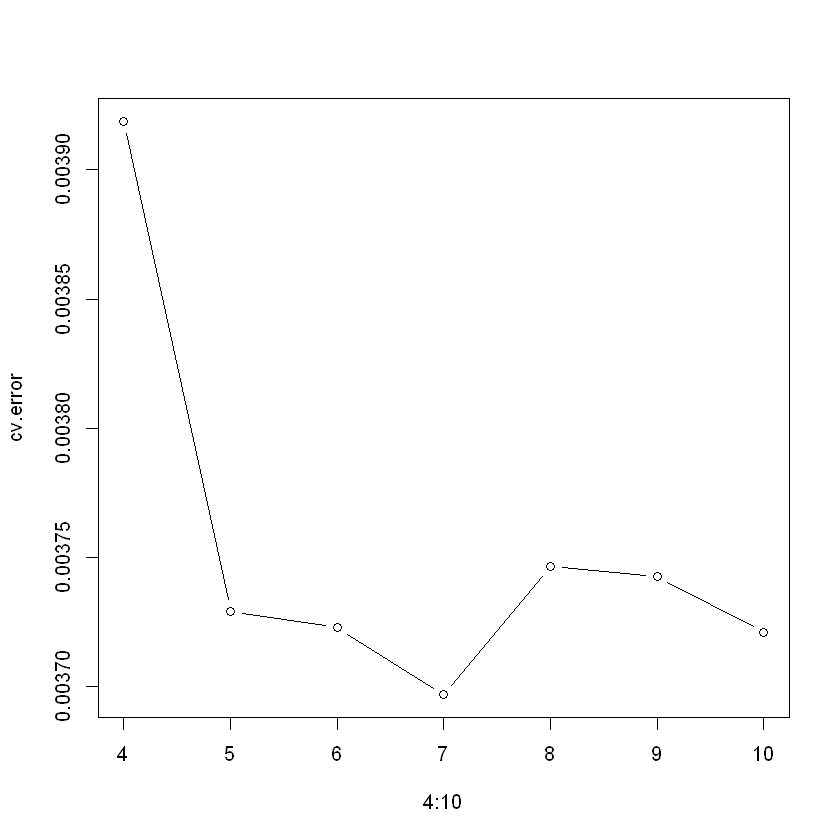

In [32]:
require(splines)
require(boot)
set.seed(1)
cv.error <- rep(0,7)
for (i in 4:10) {
  glm.fit <- glm(nox~bs(dis, df=i), data=Boston)
  cv.error[i-3] <- cv.glm(Boston, glm.fit, K=10)$delta[1]
}
cv.error
plot(4:10, cv.error, type="b")

# Exercise 10

In [40]:
#install.packages("leaps")
library("leaps")
#install.packages("gam")
library("gam")

Subset selection object
Call: regsubsets.formula(Outstate ~ ., data = train, nvmax = ncol(College) - 
    1)
17 Variables  (and intercept)
            Forced in Forced out
PrivateYes      FALSE      FALSE
Apps            FALSE      FALSE
Accept          FALSE      FALSE
Enroll          FALSE      FALSE
Top10perc       FALSE      FALSE
Top25perc       FALSE      FALSE
F.Undergrad     FALSE      FALSE
P.Undergrad     FALSE      FALSE
Room.Board      FALSE      FALSE
Books           FALSE      FALSE
Personal        FALSE      FALSE
PhD             FALSE      FALSE
Terminal        FALSE      FALSE
S.F.Ratio       FALSE      FALSE
perc.alumni     FALSE      FALSE
Expend          FALSE      FALSE
Grad.Rate       FALSE      FALSE
1 subsets of each size up to 17
Selection Algorithm: exhaustive
          PrivateYes Apps Accept Enroll Top10perc Top25perc F.Undergrad
1  ( 1 )  " "        " "  " "    " "    " "       " "       " "        
2  ( 1 )  " "        " "  " "    " "    " "       " "      

(Intercept)    PrivateYes    Room.Board      Terminal   perc.alumni 
-4726.8810613  2717.7019276     1.1032433    36.9990286    59.0863753 
       Expend     Grad.Rate 
    0.1930814    33.8303314

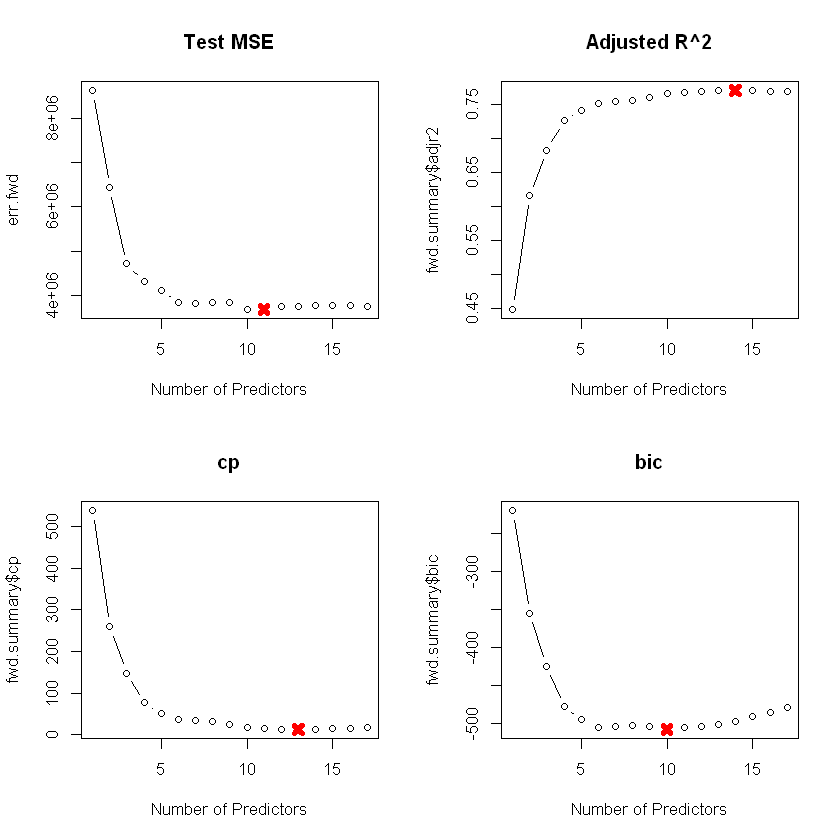

In [36]:
require(ISLR)
require(leaps)
data(College)
set.seed(1)
# split data into train and test sets
trainid <- sample(1:nrow(College), nrow(College)/2)
train <- College[trainid,]
test <- College[-trainid,]
# predict function from chapter 6 labs
predict.regsubsets <- function(object, newdata, id, ...){
  form <- as.formula(object$call[[2]])
  mat <- model.matrix(form, newdata)
  coefi <- coef(object, id=id)
  xvars <- names(coefi)
  mat[,xvars]%*%coefi
}
# forward selection
fit.fwd <- regsubsets(Outstate~., data=train, nvmax=ncol(College)-1)
(fwd.summary <- summary(fit.fwd))
err.fwd <- rep(NA, ncol(College)-1)
for(i in 1:(ncol(College)-1)) {
  pred.fwd <- predict(fit.fwd, test, id=i)
  err.fwd[i] <- mean((test$Outstate - pred.fwd)^2)
}
par(mfrow=c(2,2))
plot(err.fwd, type="b", main="Test MSE", xlab="Number of Predictors")
min.mse <- which.min(err.fwd)  
points(min.mse, err.fwd[min.mse], col="red", pch=4, lwd=5)
plot(fwd.summary$adjr2, type="b", main="Adjusted R^2", xlab="Number of Predictors")
max.adjr2 <- which.max(fwd.summary$adjr2)  
points(max.adjr2, fwd.summary$adjr2[max.adjr2], col="red", pch=4, lwd=5)
plot(fwd.summary$cp, type="b", main="cp", xlab="Number of Predictors")
min.cp <- which.min(fwd.summary$cp)  
points(min.cp, fwd.summary$cp[min.cp], col="red", pch=4, lwd=5)
plot(fwd.summary$bic, type="b", main="bic", xlab="Number of Predictors")
min.bic <- which.min(fwd.summary$bic)  
points(min.bic, fwd.summary$bic[min.bic], col="red", pch=4, lwd=5)
# model metrics do not improve much after 6 predictors
coef(fit.fwd, 6)

Warning message in model.matrix.default(mt, mf, contrasts):
"non-list contrasts argument ignored"

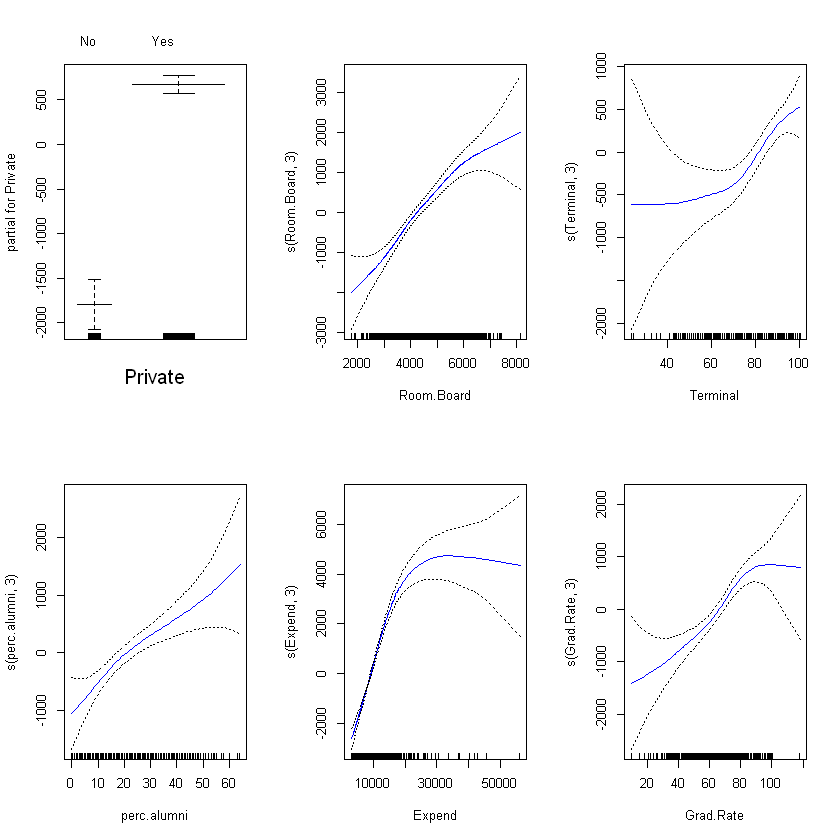

In [42]:
require(gam)
gam.fit <- gam(Outstate ~ 
                 Private +   # categorical variable
                 s(Room.Board,3) + 
                 s(Terminal,3) + 
                 s(perc.alumni,3) + 
                 s(Expend,3) + 
                 s(Grad.Rate,3), 
               data=College)
par(mfrow=c(2,3))
plot(gam.fit, se=TRUE, col="blue")

In [43]:
pred <- predict(gam.fit, test)
(mse.error <- mean((test$Outstate - pred)^2))
err.fwd[6] 

[1] 3141785

[1] 3844857

In [44]:
summary(gam.fit)


Call: gam(formula = Outstate ~ Private + s(Room.Board, 3) + s(Terminal, 
    3) + s(perc.alumni, 3) + s(Expend, 3) + s(Grad.Rate, 3), 
    data = College)
Deviance Residuals:
     Min       1Q   Median       3Q      Max 
-7110.16 -1137.02    50.44  1285.38  8278.86 

(Dispersion Parameter for gaussian family taken to be 3520187)

    Null Deviance: 12559297426 on 776 degrees of freedom
Residual Deviance: 2675342725 on 760.0001 degrees of freedom
AIC: 13936.36 

Number of Local Scoring Iterations: 2 

Anova for Parametric Effects
                   Df     Sum Sq    Mean Sq F value    Pr(>F)    
Private             1 3366732308 3366732308 956.407 < 2.2e-16 ***
s(Room.Board, 3)    1 2549088628 2549088628 724.134 < 2.2e-16 ***
s(Terminal, 3)      1  802254341  802254341 227.901 < 2.2e-16 ***
s(perc.alumni, 3)   1  525154274  525154274 149.184 < 2.2e-16 ***
s(Expend, 3)        1 1022010841 1022010841 290.329 < 2.2e-16 ***
s(Grad.Rate, 3)     1  151344060  151344060  42.993 1.014e-10 ***
Re